# Top

In [262]:
from pathlib import Path
import sys

if (root := str(Path().resolve().parent.parent / "python")) not in sys.path:
    sys.path.append(root)
print(*sys.path, sep="\n")

import numpy as np
from scipy import signal, fft
import matplotlib.pyplot as plt
from matplotlib import rcParams
import math
from rfdsppy import continuous_time as conttime, plotting, mixed_signal
import mplcursors

from importlib import reload

reload(conttime)
reload(plotting)
reload(mixed_signal)

%matplotlib ipympl
# %matplotlib inline

/usr/lib/python312.zip
/usr/lib/python3.12
/usr/lib/python3.12/lib-dynload

/home/ryanwtsai/repos/rfdsp_sim/python/venv/lib/python3.12/site-packages
/home/ryanwtsai/repos/rfdsp_sim/python


# Equalizer + ZOH frequency response @ DAC sampling rate

In [233]:
fs_in = 2
fs_eq = 0.5
n_taps_eq = 2**5

dac = mixed_signal.DAC(fs_in, fs_eq)
dac.fit(n_taps_eq=n_taps_eq)
_, h_eq = signal.freqz(dac.eq_taps_, 1, worN=dac.f_, fs=dac.fs_filter_)

/tmp/ipykernel_135836/1121853338.py:2: RuntimeWarning: divide by zero encountered in log10
  ax.plot(dac.f_, 20*np.log10(dac.g_), label="Desired Eq")


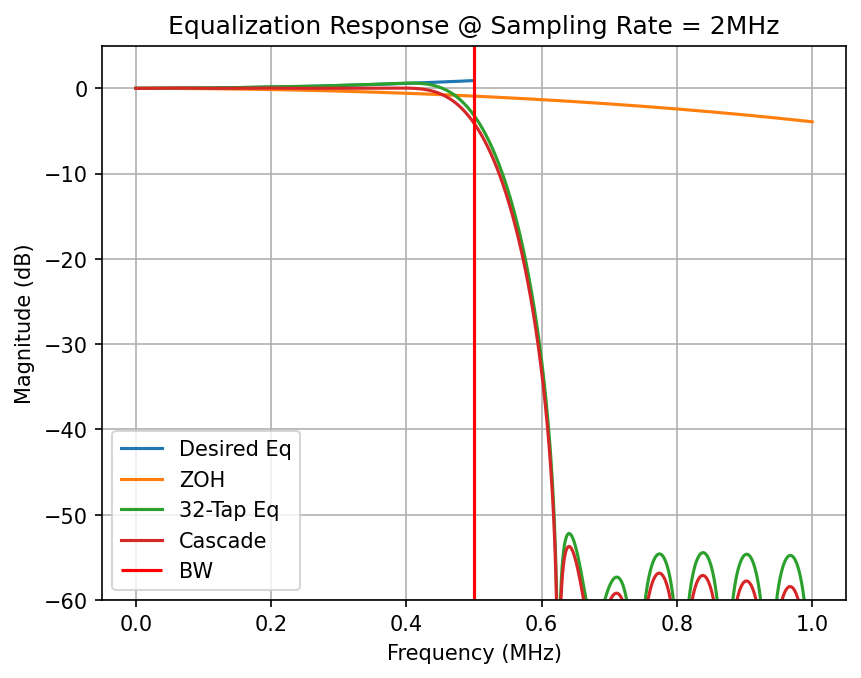

In [238]:
fig, ax = plt.subplots(dpi=150)
ax.plot(dac.f_, 20*np.log10(dac.g_), label="Desired Eq")
ax.plot(dac.f_, 20*np.log10(dac.g_zoh_), label="ZOH")
ax.plot(dac.f_, 20*np.log10(np.abs(h_eq)), label=f"{n_taps_eq}-Tap Eq")
ax.plot(dac.f_, 20*np.log10(np.abs(h_eq)*dac.g_zoh_), label="Cascade")
ax.grid()
ax.set_ylabel("Magnitude (dB)")
ax.set_xlabel("Frequency (MHz)")
ax.set_title(f"Equalization Response @ Sampling Rate = {dac.fs_in}MHz")
ax.set_ylim(bottom=-60, top=5)
ax.vlines(dac.fs_eq, ymin=-100, ymax=10, colors="r", label="BW")
ax.legend()

# mplcursors.cursor(ax)

## Simulate real sinusoid

In [268]:
fs_in = 2
fs_eq = 0.5
n_taps_eq = 2**5

dac = mixed_signal.DAC(fs_in, fs_eq)
dac.fit(n_taps_eq=n_taps_eq)

In [276]:
fs_sinu = 0.25
fs_sinu = 0.1
n = np.arange(50*int(round(fs_in/fs_sinu)))#/fs_in
x = np.cos(2*np.pi*fs_sinu/fs_in*n) # sampled signal
t, y = dac.transform(x)

Text(0.5, 1.0, 'DAC Output (ZOH + Eq) for Signal Freq=0.1 and Sampling Rate=2')

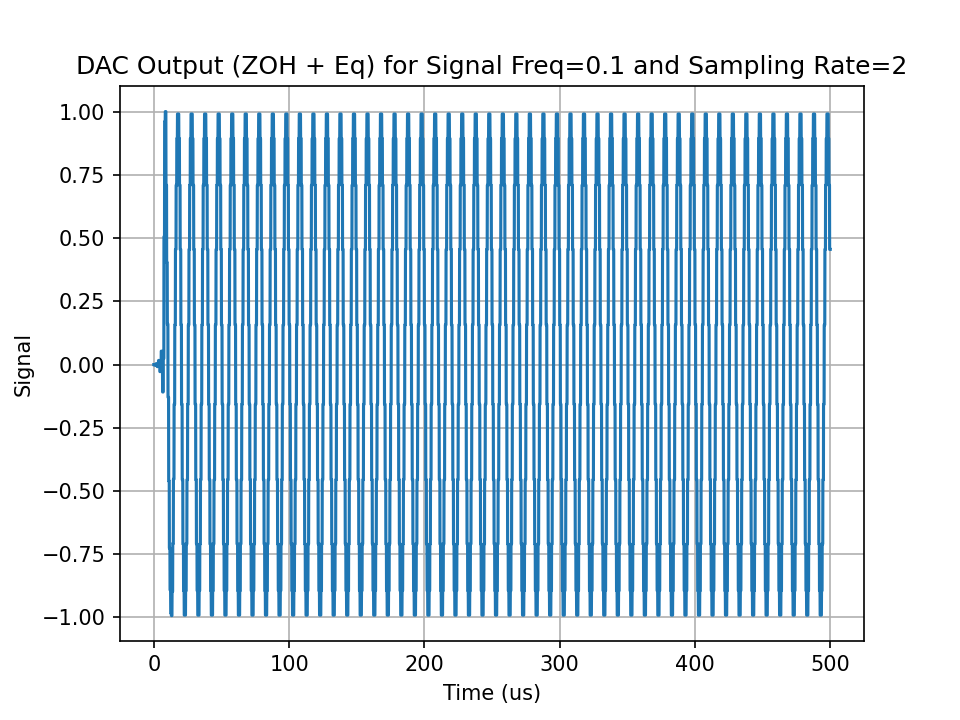

In [277]:
fig, ax = plt.subplots(dpi=150)
# ax.stem(x)
ax.plot(t, y)
ax.grid()
# ax.set_xlim(left=25, right=50)
ax.set_ylabel("Signal")
ax.set_xlabel("Time (us)")
ax.set_title(f"DAC Output (ZOH + Eq) for Signal Freq={fs_sinu} and Sampling Rate={fs_in}")

# Ideal reconstruction filter response @ CT sampling rate

In [278]:
fs_in = 2
fs_eq = 0.5
n_taps_eq = 2**10

dac = mixed_signal.DAC(fs_in, fs_eq, ideal=True)
dac.fit(n_taps_eq=n_taps_eq)
_, h_eq = signal.freqz(dac.eq_taps_, 1, worN=dac.f_, fs=dac.fs_filter_)

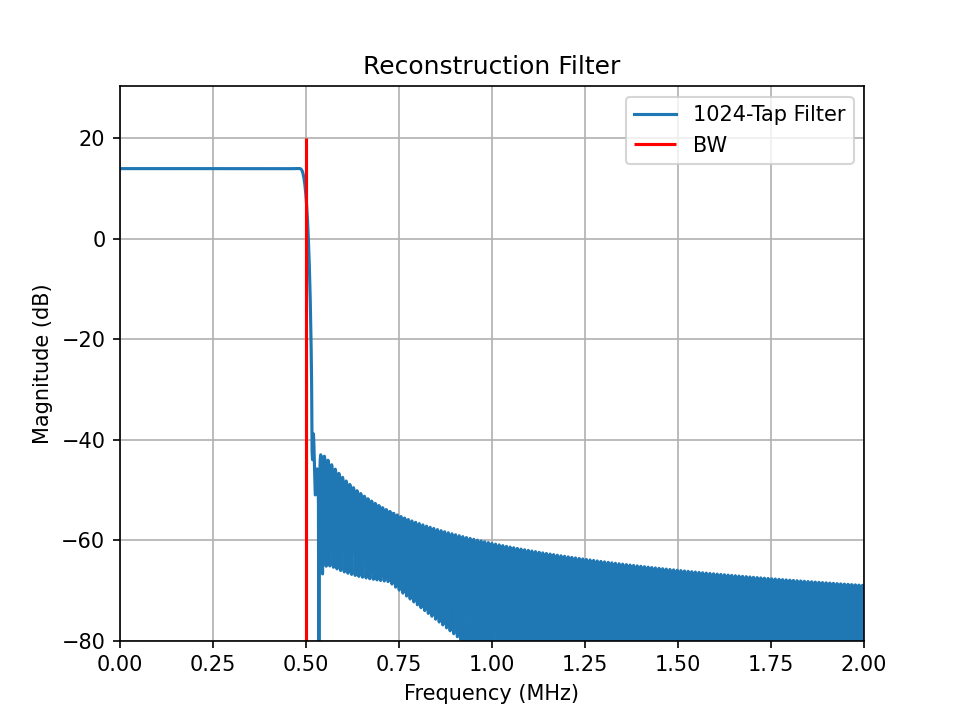

In [285]:
fig, ax = plt.subplots(dpi=150)
# ax.plot(dac.f_, 20*np.log10(dac.g_), label="Desired Eq")
# ax.plot(dac.f_, 20*np.log10(dac.g_zoh_), label="ZOH")
ax.plot(dac.f_, 20*np.log10(np.abs(h_eq)), label=f"{n_taps_eq}-Tap Filter")
# ax.plot(dac.f_, 20*np.log10(np.abs(h_eq)*dac.g_zoh_), label="Cascade")
ax.grid()
ax.set_ylabel("Magnitude (dB)")
ax.set_xlabel("Frequency (MHz)")
ax.set_title("Reconstruction Filter")
ax.set_ylim(bottom=-80)
ax.set_xlim(left=0, right=2)
ax.vlines(dac.fs_eq, ymin=-100, ymax=20, colors="r", label="BW")
ax.legend()

mplcursors.cursor(ax)

Text(0.5, 1.0, "'Ideal' Reconstruction Filter Coefficients (Sinc)")

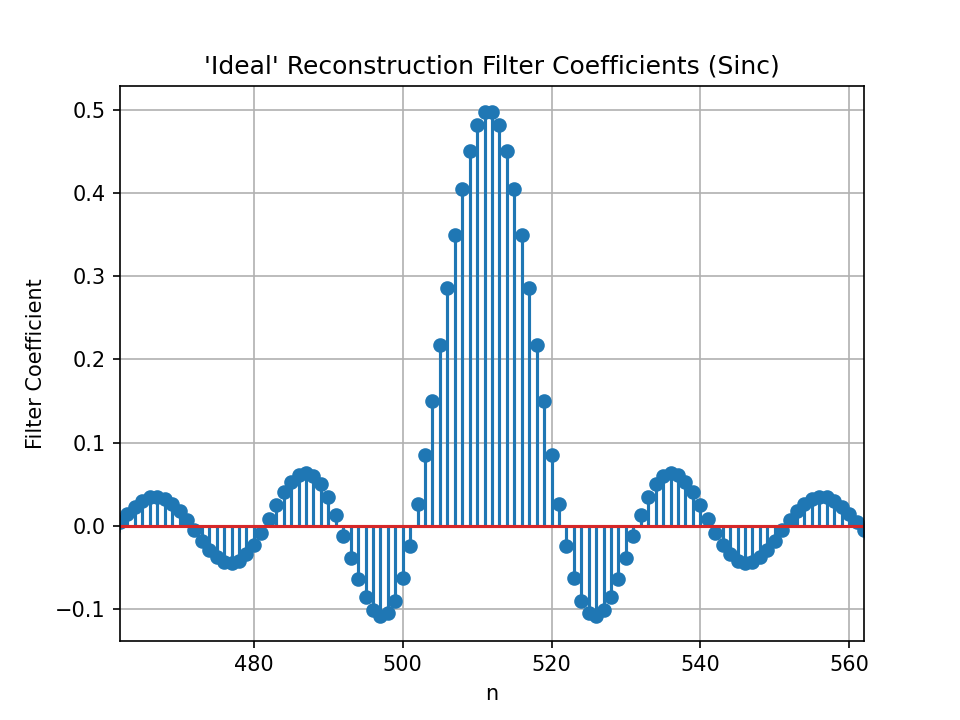

In [286]:
fig, ax = plt.subplots(dpi=150)
ax.stem(dac.eq_taps_)
ax.set_xlim(left=n_taps_eq/2-50, right=n_taps_eq/2+50)
ax.grid()
ax.set_xlabel("n")
ax.set_ylabel("Filter Coefficient")
ax.set_title("'Ideal' Reconstruction Filter Coefficients (Sinc)")

## Simulate real sinusoid

In [287]:
fs_in = 2
fs_eq = 0.5
n_taps_eq = 2**10

dac = mixed_signal.DAC(fs_in, fs_eq, ideal=True)
dac.fit(n_taps_eq=n_taps_eq)

In [ ]:
fs_sinu = 0.25
n = np.arange(50*int(round(fs_in/fs_sinu)))#/fs_in
x = np.cos(2*np.pi*fs_sinu/fs_in*n) # sampled signal
t, y = dac.transform(x)

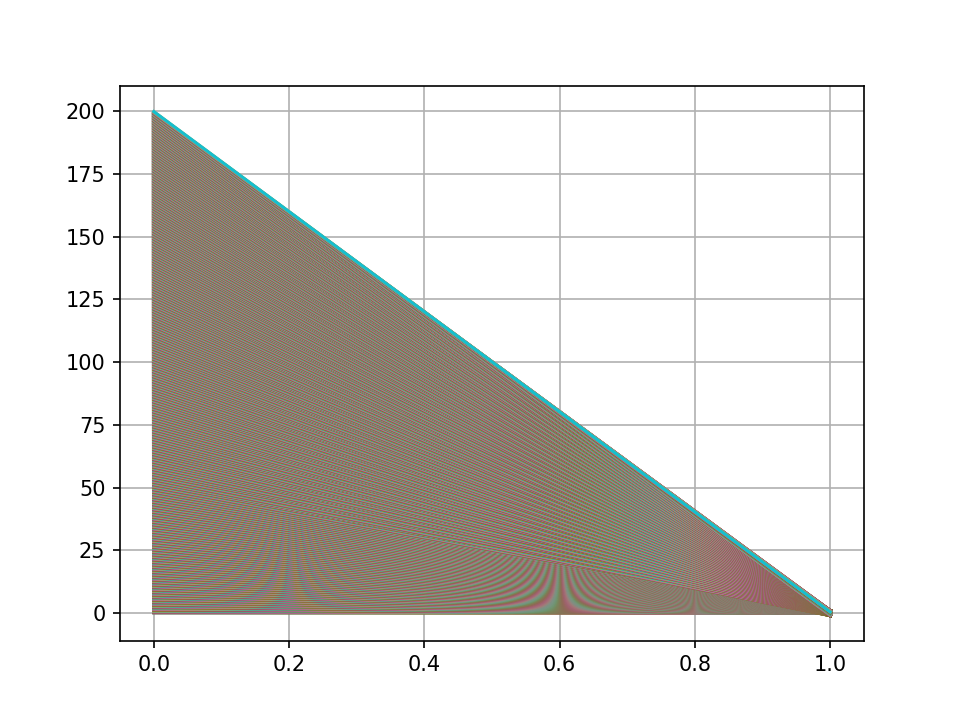

In [ ]:
fig, ax = plt.subplots(dpi=150)
# ax.stem(x)
ax.plot(t, y)
ax.grid()
# ax.set_xlim(left=400, right=800)